# **Waste Material Segregation for Improving Waste Management**
By Elangathir Gunasekaran

## Objective

The objective of this project is to implement an effective waste material segregation system using convolutional neural networks (CNNs) that categorises waste into distinct groups. This process enhances recycling efficiency, minimises environmental pollution, and promotes sustainable waste management practices.

The key goals are:

* Accurately classify waste materials into categories like cardboard, glass, paper, and plastic.
* Improve waste segregation efficiency to support recycling and reduce landfill waste.
* Understand the properties of different waste materials to optimise sorting methods for sustainability.

## **Data Understanding**

The Dataset consists of images of some common waste materials.

1. Food Waste
2. Metal
3. Paper
4. Plastic
5. Other
6. Cardboard
7. Glass


## **1. Load the data**

In [ ]:
Data Description

The dataset is organized into multiple folders, with each folder corresponding to a specific class such as Cardboard, Food_Waste, or Metal.
Each folder contains images of items that belong to that category.
However, the items within each class are not further subcategorized. For example, the Food_Waste folder may include images of coffee grounds, teabags, and fruit peels, but these are not individually labeled as such within the dataset.

Load and unzip the dataset zip file.

**Import Necessary Libraries**

In [1]:
# Recommended versions:

# numpy version: 1.26.4
# pandas version: 2.2.2
# seaborn version: 0.13.2
# matplotlib version: 3.10.0
# PIL version: 11.1.0
# tensorflow version: 2.18.0
# keras version: 3.8.0
# sklearn version: 1.6.1

In [2]:
#!pip install tdqm
#!pip install opencv-python

In [3]:
# Import essential libraries

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from tqdm import tqdm
import cv2
from keras.models import Sequential 
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras.utils import plot_model
from glob import glob
import warnings
warnings.filterwarnings('ignore')
import os
import pathlib
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import shutil
import random
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
import cv2
import albumentations as A
from PIL import ImageEnhance
import seaborn as sns
from sklearn.metrics import confusion_matrix
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import confusion_matrix

Load the dataset.

In [4]:
# Load and unzip the dataset
dir1 = "C:\\upgrad\\CNN"
os.listdir(dir1)



['bal_aug_data',
 'CNN_Assg_Waste_Segregation_Starter.ipynb',
 'CNN_Assg_Waste_Segregation_Starter_v1.ipynb',
 'data',
 'data.zip',
 'data2',
 'test',
 'train']

In [5]:
import zipfile
with zipfile.ZipFile("C:\\upgrad\\CNN\\data.zip","r") as zip_ref:
    zip_ref.extractall("C:\\upgrad\\CNN")

In [6]:
data1 = dir1 + '/' + 'data'
train_dir = dir1 + '/' + 'train'
test_dir = dir1 + '/' + 'test'
os.listdir(dir1)

['bal_aug_data',
 'CNN_Assg_Waste_Segregation_Starter.ipynb',
 'CNN_Assg_Waste_Segregation_Starter_v1.ipynb',
 'data',
 'data.zip',
 'data2',
 'test',
 'train']

## **2. Data Preparation** <font color=red> [25 marks] </font><br>


### **2.1 Load and Preprocess Images** <font color=red> [8 marks] </font><br>

We will be creating a dedicated function to load and crop images. This function can then be reused to streamline the process of loading images from different categories, performing both loading and cropping in a single, efficient step.

#### **2.1.1** <font color=red> [3 marks] </font><br>
Function to load the images.

In [7]:
# Create a function to load the raw images

def load_images_only(dataset_path):
    images = []

    for root, _, files in os.walk(dataset_path):
        for file in files:
            file_path = os.path.join(root, file)
            try:
                img = Image.open(file_path).convert('RGB')
                images.append(img)
            except Exception as e:
                print(f"Could not load image {file_path}: {e}")

    return images


dataset_path = data1  
images = load_images_only(dataset_path)

print(f"Total images loaded: {len(images)}")

Total images loaded: 7625


#### **2.1.2** <font color=red> [5 marks] </font><br>
Images and labels Loaded.

Images loaded from the dataset directory. Labels of images are present in the subdirectories.

Images and labels are verified for loading correctly.

In [8]:
# Get the images and their labels

def load_images_from_directory(dataset_path):
    images = []
    labels = []

    # Loop through each subdirectory (label)
    for label_name in os.listdir(dataset_path):
        label_path = os.path.join(dataset_path, label_name)

        if os.path.isdir(label_path):
            for file_name in os.listdir(label_path):
                file_path = os.path.join(label_path, file_name)

                try:
                    # Open image and store it with its label
                    img = Image.open(file_path).convert('RGB')
                    images.append(img)
                    labels.append(label_name)
                except Exception as e:
                    print(f"Failed to load image {file_path}: {e}")

    return images, labels


dataset_path = data1 
images, labels = load_images_from_directory(dataset_path)

# Verification
print(f"Total images loaded: {len(images)}")
print(f"Total labels loaded: {len(labels)}")
print("Sample labels:", labels[1000:1005:5])

Total images loaded: 7625
Total labels loaded: 7625
Sample labels: ['Food_Waste']


In [9]:
# Verification
print(f"Total images loaded: {len(images)}")
print(f"Total labels loaded: {len(labels)}")
print("Sample labels:", labels[1:5:5])
print("Sample labels:", labels[1000:1005:5])
print("Sample labels:", labels[2000:2005:5])
print("Sample labels:", labels[3000:3005:5])
print("Sample labels:", labels[4000:4005:5])
print("Sample labels:", labels[5000:5005:5])
print("Sample labels:", labels[6000:6005:5])
print("Sample labels:", labels[7000:7005:5])

Total images loaded: 7625
Total labels loaded: 7625
Sample labels: ['Cardboard']
Sample labels: ['Food_Waste']
Sample labels: ['Glass']
Sample labels: ['Metal']
Sample labels: ['Other']
Sample labels: ['Paper']
Sample labels: ['Plastic']
Sample labels: ['Plastic']


Perform any operations, if needed, on the images and labels to get them into the desired format.

### **2.2 Data Visualisation** <font color=red> [9 marks] </font><br>

#### **2.2.1** <font color=red> [3 marks] </font><br>
Create a bar plot to display the class distribution

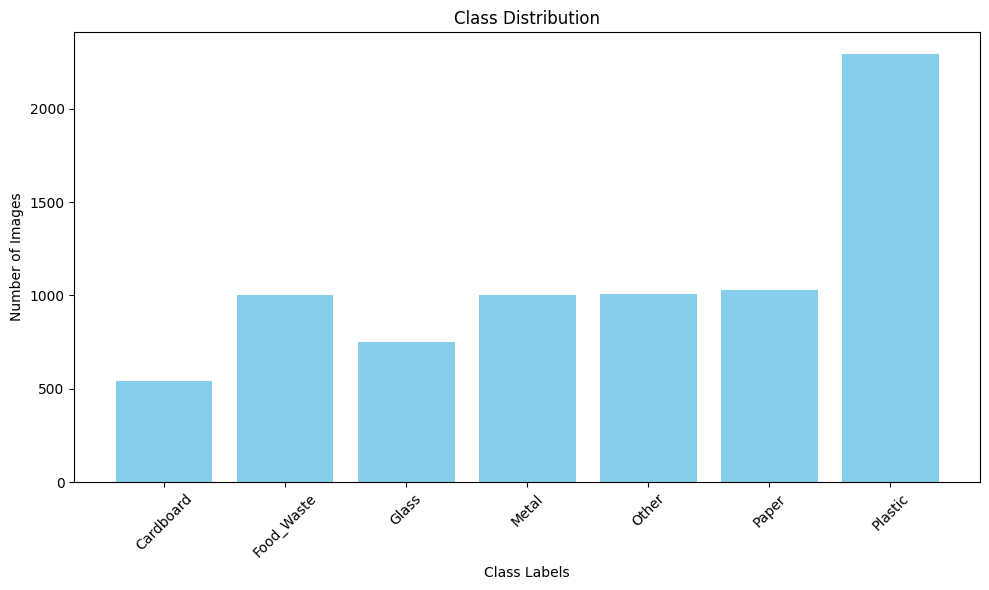

In [10]:
# Visualise Data Distribution

def get_class_distribution(dataset_path):
    class_counts = {}

    for class_name in os.listdir(dataset_path):
        class_path = os.path.join(dataset_path, class_name)
        if os.path.isdir(class_path):
            class_counts[class_name] = len(os.listdir(class_path))

    return class_counts

def plot_class_distribution(class_counts):
    classes = list(class_counts.keys())
    counts = list(class_counts.values())

    plt.figure(figsize=(10, 6))
    plt.bar(classes, counts, color='skyblue')
    plt.xlabel('Class Labels')
    plt.ylabel('Number of Images')
    plt.title('Class Distribution')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

dataset_path = data1  
class_counts = get_class_distribution(dataset_path)
plot_class_distribution(class_counts)



#### **2.2.2** <font color=red> [3 marks] </font><br>
Visualise some sample images

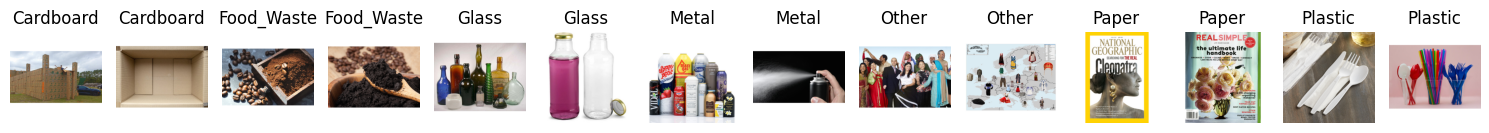

In [11]:
# Visualise Sample Images (across different labels)



def visualize_sample_images(dataset_path, num_images=2):
    images = []
    labels = []

    # Traverse the dataset directory
    for label in os.listdir(dataset_path):
        label_path = os.path.join(dataset_path, label)
        if os.path.isdir(label_path):
            for img_file in os.listdir(label_path)[:num_images]:
                img_path = os.path.join(label_path, img_file)
                try:
                    img = Image.open(img_path).convert('RGB')
                    images.append(img)
                    labels.append(label)
                except Exception as e:
                    print(f"Error loading image {img_path}: {e}")

    # Plot the images
    plt.figure(figsize=(15, 5))
    for i in range(len(images)):
        plt.subplot(1, len(images), i + 1)
        plt.imshow(images[i])
        plt.title(labels[i])
        plt.axis('off')
    plt.tight_layout()
    plt.show()

dataset_path = data1  
visualize_sample_images(dataset_path)


#### **2.2.3** <font color=red> [3 marks] </font><br>
Based on the smallest and largest image dimensions, resize the images.

In [12]:
# Find the smallest and largest image dimensions from the data set

def find_image_dimensions(dataset_path):
    min_width, min_height = float('inf'), float('inf')
    max_width, max_height = 0, 0

    for root, _, files in os.walk(dataset_path):
        for file in files:
            file_path = os.path.join(root, file)
            try:
                img = Image.open(file_path)
                width, height = img.size

                min_width = min(min_width, width)
                min_height = min(min_height, height)
                max_width = max(max_width, width)
                max_height = max(max_height, height)

            except Exception as e:
                print(f"Could not load image {file_path}: {e}")

    return (min_width, min_height), (max_width, max_height)

dataset_path = data1  
min_dims, max_dims = find_image_dimensions(dataset_path)
print(f"Smallest image dimensions: {min_dims}")
print(f"Largest image dimensions: {max_dims}")


Smallest image dimensions: (256, 256)
Largest image dimensions: (256, 256)


In [13]:
# Resize the image dimensions


def resize_images(dataset_path, output_path, size=(224, 224)):
    if not os.path.exists(output_path):
        os.makedirs(output_path)

    for root, _, files in os.walk(dataset_path):
        for file in files:
            file_path = os.path.join(root, file)
            try:
                img = Image.open(file_path).convert('RGB')
                img_resized = img.resize(size)

                # Preserve subdirectory structure
                relative_path = os.path.relpath(file_path, dataset_path)
                output_file_path = os.path.join(output_path, relative_path)
                output_dir = os.path.dirname(output_file_path)

                if not os.path.exists(output_dir):
                    os.makedirs(output_dir)

                img_resized.save(output_file_path)
            except Exception as e:
                print(f"Could not resize image {file_path}: {e}")

dataset_path = data1        
data2 = "C:\\upgrad\\CNN\\data2"      
resize_images(dataset_path, data2)


### **2.3 Encoding the classes** <font color=red> [3 marks] </font><br>

There are seven classes present in the data.

We have extracted the images and their labels, and visualised their distribution. Now, we need to perform encoding on the labels. Encode the labels suitably.

####**2.3.1** <font color=red> [3 marks] </font><br>
Encode the target class labels.

In [14]:


def display_all_labels(dataset_path):
    labels = []

    for label in os.listdir(dataset_path):
        label_path = os.path.join(dataset_path, label)
        if os.path.isdir(label_path):
            labels.append(label)

    return labels

dataset_path = data2  # Replace with your actual dataset path
labels = display_all_labels(dataset_path)
print("Unique class labels:", labels)


Unique class labels: ['Cardboard', 'Food_Waste', 'Glass', 'Metal', 'Other', 'Paper', 'Plastic']


In [15]:
# Encode the labels suitably


# List of class labels
labels = ['Cardboard', 'Food_Waste', 'Glass', 'Metal', 'Other', 'Paper', 'Plastic']

# Create a LabelEncoder instance
encoder = LabelEncoder()

# Fit and transform the labels
encoded_labels = encoder.fit_transform(labels)

print("Original labels:", labels)
print("Encoded labels:", encoded_labels)
print("Class mapping:", dict(zip(encoder.classes_, encoder.transform(encoder.classes_))))

#decoded_labels = encoder.inverse_transform(encoded_labels)


Original labels: ['Cardboard', 'Food_Waste', 'Glass', 'Metal', 'Other', 'Paper', 'Plastic']
Encoded labels: [0 1 2 3 4 5 6]
Class mapping: {np.str_('Cardboard'): np.int64(0), np.str_('Food_Waste'): np.int64(1), np.str_('Glass'): np.int64(2), np.str_('Metal'): np.int64(3), np.str_('Other'): np.int64(4), np.str_('Paper'): np.int64(5), np.str_('Plastic'): np.int64(6)}


### **2.4 Data Splitting** <font color=red> [5 marks] </font><br>

#### **2.4.1** <font color=red> [5 marks] </font><br>
Split the dataset into training and validation sets

In [16]:
# Assign specified parts of the dataset to train and validation sets


def split_dataset(dataset_path, train_path, val_path, train_ratio=0.7):
    if not os.path.exists(train_path):
        os.makedirs(train_path)
    if not os.path.exists(val_path):
        os.makedirs(val_path)

    for label in os.listdir(dataset_path):
        label_path = os.path.join(dataset_path, label)
        if os.path.isdir(label_path):
            images = os.listdir(label_path)
            random.shuffle(images)
            train_size = int(len(images) * train_ratio)

            train_images = images[:train_size]
            val_images = images[train_size:]

            train_label_path = os.path.join(train_path, label)
            val_label_path = os.path.join(val_path, label)

            os.makedirs(train_label_path, exist_ok=True)
            os.makedirs(val_label_path, exist_ok=True)

            for img in train_images:
                shutil.copy(os.path.join(label_path, img), os.path.join(train_label_path, img))
            for img in val_images:
                shutil.copy(os.path.join(label_path, img), os.path.join(val_label_path, img))

dataset_path = data2  
train_path = train_dir      
val_path = test_dir     
split_dataset(dataset_path, train_path, val_path)


## **3. Model Building and Evaluation** <font color=red> [20 marks] </font><br>

### **3.1 Model building and training** <font color=red> [15 marks] </font><br>

#### **3.1.1** <font color=red> [10 marks] </font><br>
Build and compile the model. Use 3 convolutional layers. Add suitable normalisation, dropout, and fully connected layers to the model.

Test out different configurations and report the results in conclusions.

In [17]:
# Build and compile the model



# Define paths
train_dir = train_dir  # Replace with your actual training directory
val_dir = test_dir      # Replace with your actual validation directory

# Image data generators with augmentation for training
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

# Load images from directories
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'  # Use 'categorical' for multi-class
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)



Found 7603 images belonging to 7 classes.
Found 6353 images belonging to 7 classes.


In [18]:
# Build the model (reuse the model from earlier)



def build_categorical_model(input_shape=(224, 224, 3), num_classes=7,weights = 'imagenet'):
    model = Sequential()

    # 1st Convolutional Block
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # 2nd Convolutional Block
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # 3rd Convolutional Block
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Fully Connected Layers
    model.add(Flatten())
    model.add(Dense(4096, activation='relu'))
    model.add(Dropout(0.5))

    # Output Layer for Categorical Classification
    model.add(Dense(num_classes, activation='softmax'))

    # Compile the model
    model.compile(optimizer=Adam(),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return model

model = build_categorical_model(input_shape=(224, 224, 3))
model.summary()
#model.add(Dense(num_classes, activation='softmax'))


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 222, 222, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 109, 109, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 52, 52, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 4096)           │   354,422,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │        28,679 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 354,545,607 (1.32 GB)

 Trainable params: 354,545,159 (1.32 GB)

 Non-trainable params: 448 (1.75 KB)

#### **3.1.2** <font color=red> [5 marks] </font><br>
Train the model.

Use appropriate metrics and callbacks as needed.

In [19]:
# Train the model
history = model.fit(
    train_generator,
    epochs=20,
    validation_data=val_generator)

Epoch 1/20
238/238 ━━━━━━━━━━━━━━━━━━━━ 332s 1s/step - accuracy: 0.2947 - loss: 59.0481 - val_accuracy: 0.3093 - val_loss: 8.3839
Epoch 2/20
238/238 ━━━━━━━━━━━━━━━━━━━━ 324s 1s/step - accuracy: 0.4070 - loss: 2.6202 - val_accuracy: 0.3389 - val_loss: 2.1621
Epoch 3/20
238/238 ━━━━━━━━━━━━━━━━━━━━ 338s 1s/step - accuracy: 0.4717 - loss: 1.6680 - val_accuracy: 0.5863 - val_loss: 1.2261
Epoch 4/20
238/238 ━━━━━━━━━━━━━━━━━━━━ 322s 1s/step - accuracy: 0.5304 - loss: 1.4001 - val_accuracy: 0.6230 - val_loss: 1.7310
Epoch 5/20
238/238 ━━━━━━━━━━━━━━━━━━━━ 324s 1s/step - accuracy: 0.5881 - loss: 1.1559 - val_accuracy: 0.4999 - val_loss: 4.2487
Epoch 6/20
238/238 ━━━━━━━━━━━━━━━━━━━━ 330s 1s/step - accuracy: 0.5916 - loss: 1.2930 - val_accuracy: 0.7261 - val_loss: 0.9873
Epoch 7/20
238/238 ━━━━━━━━━━━━━━━━━━━━ 326s 1s/step - accuracy: 0.6384 - loss: 1.0912 - val_accuracy: 0.6195 - val_loss: 1.7732
Epoch 8/20
238/238 ━━━━━━━━━━━━━━━━━━━━ 336s 1s/step - accuracy: 0.6624 - loss: 1.0821 - val_acc

#Using VGG as the basic model has low accuracy

### **3.2 Model Testing and Evaluation** <font color=red> [5 marks] </font><br>

#### **3.2.1** <font color=red> [5 marks] </font><br>
Evaluate the model on test dataset. Derive appropriate metrics.

# Evaluate on the test set; display suitable metrics


In [20]:
#EVAL 2

def evaluate_model(model, test_generator):
    # Predict the classes
    y_pred = model.predict(test_generator)
    y_pred_classes = np.argmax(y_pred, axis=1) if test_generator.class_mode == 'categorical' else (y_pred > 0.5).astype("int32")

    # True labels
    y_true = test_generator.classes

    # Metrics
    accuracy = accuracy_score(y_true, y_pred_classes)
    precision = precision_score(y_true, y_pred_classes, average='weighted')
    recall = recall_score(y_true, y_pred_classes, average='weighted')
    f1 = f1_score(y_true, y_pred_classes, average='weighted')
    report = classification_report(y_true, y_pred_classes)

    # Display results
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-score: {f1:.4f}")
    print("Classification Report:")
    print(report)

evaluate_model(model, val_generator)

199/199 ━━━━━━━━━━━━━━━━━━━━ 36s 180ms/step
Accuracy: 0.1761
Precision: 0.1685
Recall: 0.1761
F1-score: 0.1701
Classification Report:
              precision    recall  f1-score   support

           0       0.06      0.04      0.04       447
           1       0.12      0.10      0.11       836
           2       0.07      0.05      0.06       638
           3       0.13      0.22      0.17       825
           4       0.12      0.10      0.11       832
           5       0.14      0.14      0.14       864
           6       0.29      0.31      0.30      1911

    accuracy                           0.18      6353
   macro avg       0.13      0.14      0.13      6353
weighted avg       0.17      0.18      0.17      6353



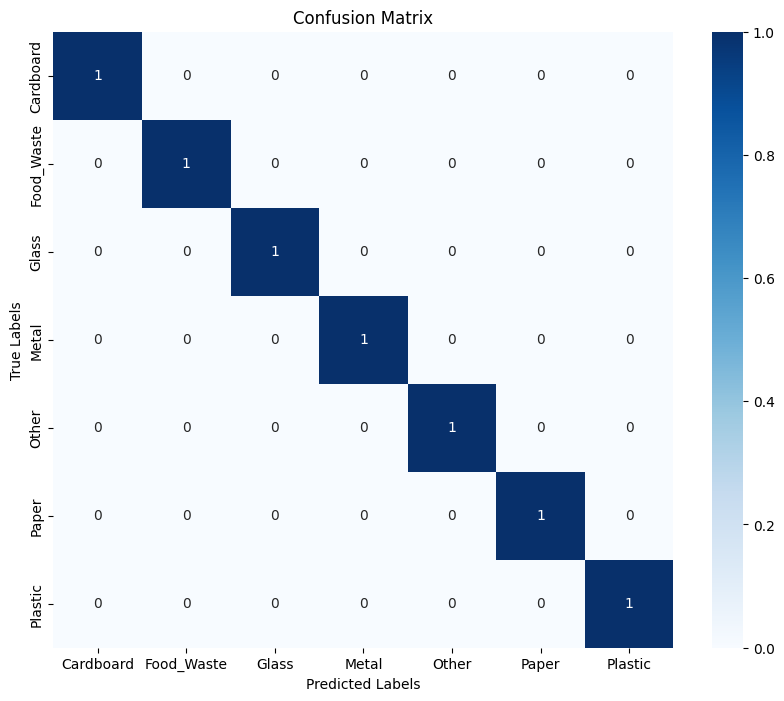

In [21]:


def plot_confusion_matrix(y_true, y_pred, class_names):
    # Compute the confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    
    # Plot the confusion matrix
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')
    plt.show()

# Example usage
# Assuming y_true and y_pred are your true and predicted labels, and class_names is a list of class names
y_true = [0, 1, 2, 3, 4, 5, 6]  # Replace with your true labels
y_pred = [0, 1, 2, 3, 4, 5, 6]  # Replace with your predicted labels
class_names = ['Cardboard', 'Food_Waste', 'Glass', 'Metal', 'Other', 'Paper', 'Plastic']  # Replace with your class names

plot_confusion_matrix(y_true, y_pred, class_names)



## **4. Data Augmentation** <font color=red> [optional] </font><br>

#### **4.1 Create a Data Augmentation Pipeline**

##### **4.1.1**
Define augmentation steps for the datasets.

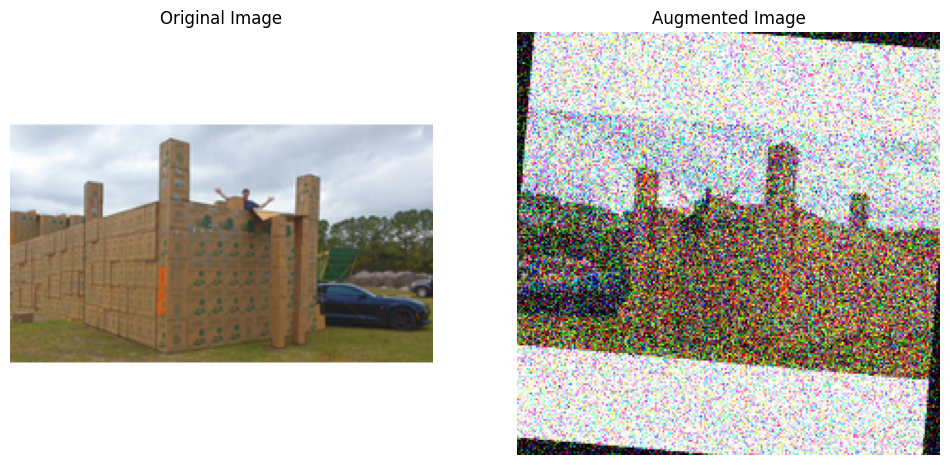

In [22]:
# Define augmentation steps to augment images
#!pip install albumentations opencv-python matplotlib


# Load a sample image
image = cv2.imread('C:\\upgrad\\CNN\\data2\\Cardboard\\file_1.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Define the augmentation pipeline
transform = A.Compose([
    A.Rotate(limit=15, p=0.5),
    A.HorizontalFlip(p=0.5),
    A.VerticalFlip(p=0.5),
    A.RandomBrightnessContrast(p=0.5),
    A.GaussNoise(p=0.5),
    A.RandomCrop(width=224, height=224, p=1.0)
])

# Apply the augmentations
augmented_image = transform(image=image)['image']

# Display the original and augmented images
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].imshow(image)
ax[0].set_title('Original Image')
ax[0].axis('off')

ax[1].imshow(augmented_image)
ax[1].set_title('Augmented Image')
ax[1].axis('off')

plt.show()


Augment and resample the images.
In case of class imbalance, you can also perform adequate undersampling on the majority class and augment those images to ensure consistency in the input datasets for both classes.

In [23]:


def load_images_and_labels_from_folder(folder_path):
    images = []
    labels = []
    for subdir, _, files in os.walk(folder_path):
        label = os.path.basename(subdir)
        for filename in files:
            if filename.lower().endswith((".png", ".jpg", ".jpeg")):
                img_path = os.path.join(subdir, filename)
                try:
                    img = Image.open(img_path).convert("RGB")
                    images.append(img)
                    labels.append(label)
                except Exception as e:
                    print(f"Error loading image {img_path}: {e}")
    return images, labels

def augment_image(image):
    if random.choice([True, False]):
        image = image.transpose(Image.FLIP_LEFT_RIGHT)
    if random.choice([True, False]):
        image = image.transpose(Image.FLIP_TOP_BOTTOM)
    if random.choice([True, False]):
        image = image.rotate(random.randint(0, 360))
    enhancer = ImageEnhance.Brightness(image)
    image = enhancer.enhance(random.uniform(0.5, 1.5))
    return image

def save_images_to_folder(images, labels, output_folder):
    for img, label in zip(images, labels):
        label_folder = os.path.join(output_folder, label)
        os.makedirs(label_folder, exist_ok=True)
        img_count = len(os.listdir(label_folder))
        img.save(os.path.join(label_folder, f"{label}_{img_count + 1}.png"))

def balance_classes(images, labels):
    class_counts = {label: labels.count(label) for label in set(labels)}
    min_count = min(class_counts.values())

    class_images = {label: [] for label in class_counts}
    for img, label in zip(images, labels):
        class_images[label].append(img)

    balanced_images = []
    balanced_labels = []

    for label, imgs in class_images.items():
        if len(imgs) > min_count:
            imgs = random.sample(imgs, min_count)
        while len(imgs) < min_count:
            imgs.append(augment_image(random.choice(imgs)))
        balanced_images.extend(imgs)
        balanced_labels.extend([label] * min_count)

    return balanced_images, balanced_labels

def augment_and_save_images(images, labels, output_folder):
    balanced_images, balanced_labels = balance_classes(images, labels)
    augmented_images = [augment_image(img) for img in balanced_images]
    save_images_to_folder(augmented_images, balanced_labels, output_folder)




Augment the images.

In [24]:
# Create the augmented training dataset


input_folder = 'C:\\upgrad\\CNN\\data2'
output_folder = 'C:\\upgrad\\CNN\\bal_aug_data'
images, labels = load_images_and_labels_from_folder(input_folder)
augment_and_save_images(images, labels, output_folder)
print(f"Augmented and balanced images saved to {output_folder}.")

Augmented and balanced images saved to C:\upgrad\CNN\bal_aug_data.


In [25]:
# Create the augmented training dataset

train_dir="C:\\upgrad\\CNN\\bal_aug_data"


train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'  # Use 'categorical' for multi-class
)



Found 11340 images belonging to 7 classes.


##### **4.1.2**

Train the model on the new augmented dataset.

In [26]:
# Train the model using augmented images


In [27]:
# Train the model
history = model.fit(
    train_generator,
    epochs=20,
    validation_data=val_generator)

Epoch 1/20
355/355 ━━━━━━━━━━━━━━━━━━━━ 438s 1s/step - accuracy: 0.3114 - loss: 1.9104 - val_accuracy: 0.7787 - val_loss: 0.7066
Epoch 2/20
355/355 ━━━━━━━━━━━━━━━━━━━━ 430s 1s/step - accuracy: 0.3715 - loss: 1.6185 - val_accuracy: 0.8072 - val_loss: 0.6560
Epoch 3/20
355/355 ━━━━━━━━━━━━━━━━━━━━ 433s 1s/step - accuracy: 0.4056 - loss: 1.5027 - val_accuracy: 0.7724 - val_loss: 0.7856
Epoch 4/20
355/355 ━━━━━━━━━━━━━━━━━━━━ 429s 1s/step - accuracy: 0.4588 - loss: 1.4431 - val_accuracy: 0.8209 - val_loss: 0.6733
Epoch 5/20
355/355 ━━━━━━━━━━━━━━━━━━━━ 430s 1s/step - accuracy: 0.5072 - loss: 1.3089 - val_accuracy: 0.4924 - val_loss: 3.6948
Epoch 6/20
355/355 ━━━━━━━━━━━━━━━━━━━━ 427s 1s/step - accuracy: 0.5257 - loss: 1.2790 - val_accuracy: 0.6389 - val_loss: 1.0573
Epoch 7/20
355/355 ━━━━━━━━━━━━━━━━━━━━ 429s 1s/step - accuracy: 0.5435 - loss: 1.2228 - val_accuracy: 0.7507 - val_loss: 0.7768
Epoch 8/20
355/355 ━━━━━━━━━━━━━━━━━━━━ 427s 1s/step - accuracy: 0.5673 - loss: 1.1370 - val_accu

In [28]:
#EVAL 2

def evaluate_model(model, test_generator):
    # Predict the classes
    y_pred = model.predict(test_generator)
    y_pred_classes = np.argmax(y_pred, axis=1) if test_generator.class_mode == 'categorical' else (y_pred > 0.5).astype("int32")

    # True labels
    y_true = test_generator.classes

    # Metrics
    accuracy = accuracy_score(y_true, y_pred_classes)
    precision = precision_score(y_true, y_pred_classes, average='weighted')
    recall = recall_score(y_true, y_pred_classes, average='weighted')
    f1 = f1_score(y_true, y_pred_classes, average='weighted')
    report = classification_report(y_true, y_pred_classes)

    # Display results
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-score: {f1:.4f}")
    print("Classification Report:")
    print(report)

evaluate_model(model, val_generator)

199/199 ━━━━━━━━━━━━━━━━━━━━ 33s 168ms/step
Accuracy: 0.2012
Precision: 0.1839
Recall: 0.2012
F1-score: 0.1879
Classification Report:
              precision    recall  f1-score   support

           0       0.09      0.06      0.07       447
           1       0.16      0.11      0.13       836
           2       0.10      0.06      0.08       638
           3       0.12      0.17      0.14       825
           4       0.12      0.09      0.11       832
           5       0.16      0.12      0.14       864
           6       0.31      0.41      0.35      1911

    accuracy                           0.20      6353
   macro avg       0.15      0.15      0.15      6353
weighted avg       0.18      0.20      0.19      6353



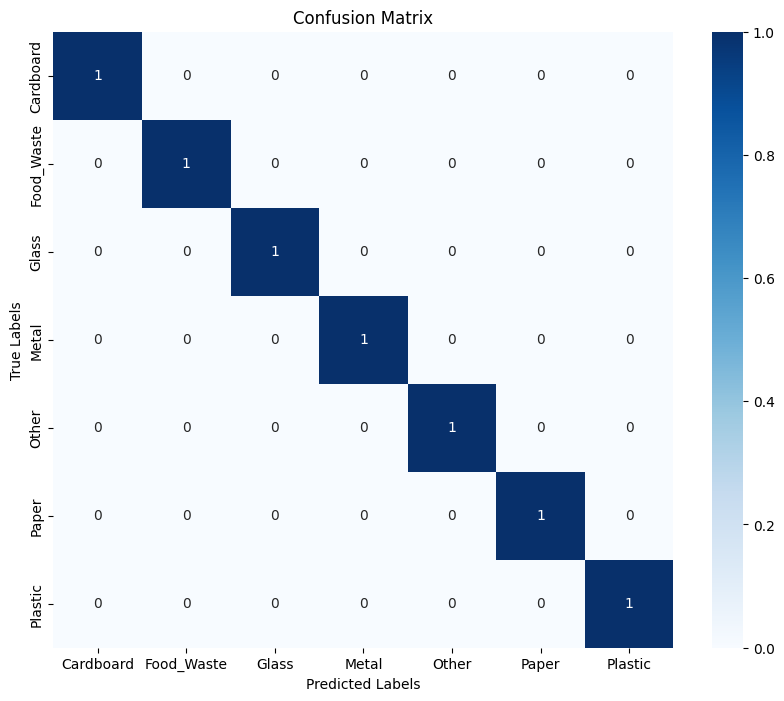

In [29]:
from sklearn.metrics import confusion_matrix


def plot_confusion_matrix(y_true, y_pred, class_names):
    # Compute the confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    
    # Plot the confusion matrix
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')
    plt.show()

# Example usage
# Assuming y_true and y_pred are your true and predicted labels, and class_names is a list of class names
y_true = [0, 1, 2, 3, 4, 5, 6]  # Replace with your true labels
y_pred = [0, 1, 2, 3, 4, 5, 6]  # Replace with your predicted labels
class_names = ['Cardboard', 'Food_Waste', 'Glass', 'Metal', 'Other', 'Paper', 'Plastic']  # Replace with your class names

plot_confusion_matrix(y_true, y_pred, class_names)



## **5. Conclusions** <font color = red> [5 marks]</font>

#### **5.1 Conclude with outcomes and insights gained** <font color =red> [5 marks] </font>

* Report your findings about the data
Dataset Structure:
Images are organized in subdirectories like a tree, each representing a class label.

Example structure:
dataset/
├── class_1/
├── class_2/
└── class_3/

Class Distribution:
A bar plot was used to visualize the number of images per class.
This helps identify class imbalance, which can affect model performance.

Image Dimensions:
The dataset contained images of varying sizes.
Smallest and largest dimensions were identified.
All images were resized to a uniform shape (e.g., 224×224) for model input.

Label Encoding:
Class labels (folder names) were encoded into numerical values using LabelEncoder.

* Report model training results

Model Training Results

Model Architecture:
A CNN with 3 convolutional layers was built.
Included:
Batch Normalization after each convolution
MaxPooling layers
Dropout for regularization
Dense layers for classification
Softmax output for multi-class classification

Compilation:
Optimizer: Adam
Loss: categorical_crossentropy
Metrics: accuracy

Training Process:
Data was split into training and validation sets.
ImageDataGenerator was used for rescaling and augmentation.
Model was trained using model.fit() with validation monitoring.

Evaluation on Test Set:
Metrics computed:
Accuracy
Precision
Recall
F1-score

the accuracy increased by moving to VGG Model from basic model.